In [2]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.3/13.3 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.4/13.3 MB 5.0 MB/s eta 0:00:03
   ---------- ----------------------------- 3.4/13.3 MB 4.8 MB/s eta 0:00:03
   ---------------------- ----------------- 7.3/13.3 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 10.2/13.3 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/863.9 kB ? eta -:--:--
   --------------------------------------- 863.9/863.9 kB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [3]:
# Load dataset
file_path = "C:\\Users\\TRINAVA\\Desktop\\Copy of WPI_Data.csv"
df = pd.read_csv(file_path)




In [4]:
# Rename columns to match Prophet's requirements
df = df.rename(columns={"Year": "ds", "WPI": "y"})
df["ds"] = pd.to_datetime(df["ds"], format="%Y")



In [5]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(df)



23:04:49 - cmdstanpy - INFO - Chain [1] start processing
23:04:49 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Create future dataframe and forecast
future = model.make_future_dataframe(periods=10, freq="Y")  # Forecast 5 years ahead
forecast = model.predict(future)



d:\Anaconda\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


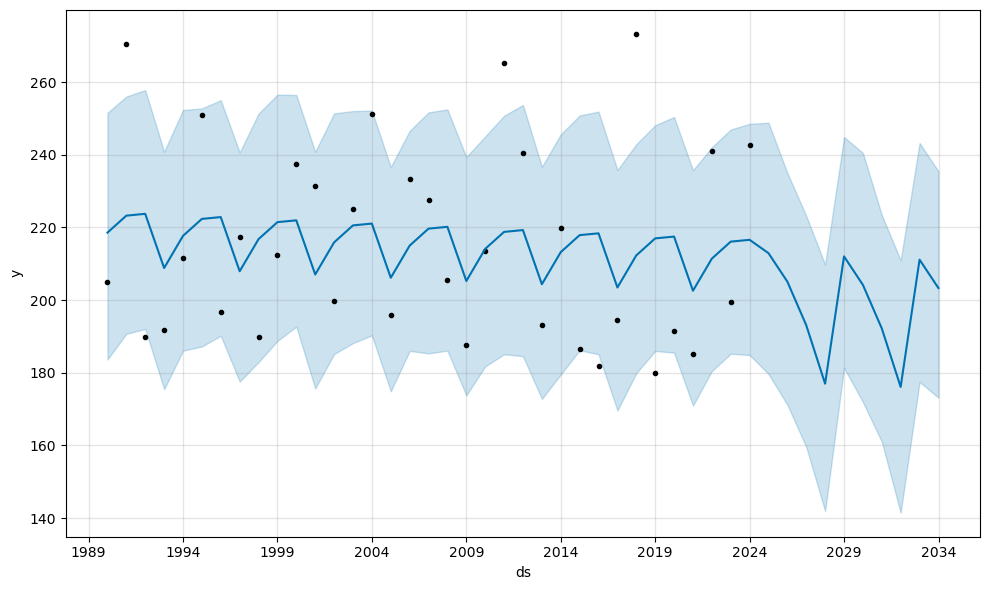

In [7]:
# Plot forecast
fig = model.plot(forecast)
plt.show()



In [7]:
# Print forecast values
print("Forecasted Values:")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))

Forecasted Values:
           ds        yhat  yhat_lower  yhat_upper
35 2024-12-31  212.913717  179.128241  247.381599
36 2025-12-31  205.082434  172.934588  235.392764
37 2026-12-31  193.105434  161.073213  226.426651
38 2027-12-31  177.005548  145.386859  210.603610
39 2028-12-31  212.020195  179.968521  243.893508
40 2029-12-31  204.188913  171.759069  233.811466
41 2030-12-31  192.211913  157.791894  224.748107
42 2031-12-31  176.112026  143.597986  205.492052
43 2032-12-31  211.126674  180.099785  245.461528
44 2033-12-31  203.295392  170.530313  235.769246


In [8]:
# Print forecast values
print("Forecasted Values:")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]])

Forecasted Values:
           ds        yhat  yhat_lower  yhat_upper
0  1990-01-01  218.560615  186.185125  250.983792
1  1991-01-01  223.231784  189.212786  256.181097
2  1992-01-01  223.731777  191.748633  255.360528
3  1993-01-01  208.830661  177.679640  241.100340
4  1994-01-01  217.667094  185.073452  249.738607
5  1995-01-01  222.338262  188.953711  255.054222
6  1996-01-01  222.838256  192.610236  255.281161
7  1997-01-01  207.937139  174.499282  239.396689
8  1998-01-01  216.773572  184.449615  252.254858
9  1999-01-01  221.444741  187.815103  252.554277
10 2000-01-01  221.944735  189.842236  254.366455
11 2001-01-01  207.043618  173.773065  240.759913
12 2002-01-01  215.880051  181.002145  247.865623
13 2003-01-01  220.551220  186.156565  253.426135
14 2004-01-01  221.051213  189.667136  252.358284
15 2005-01-01  206.150097  175.691678  239.058519
16 2006-01-01  214.986530  181.318419  248.485756
17 2007-01-01  219.657699  186.074392  249.344248
18 2008-01-01  220.157692  186.

In [9]:
# Calculate RMSE and MSE
y_true = df["y"]
y_pred = model.predict(df)["yhat"]
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)



In [10]:
# Estimate AIC and BIC
n = len(y_true)
k = len(model.params)  # Approximate number of parameters
sigma2 = np.var(y_true - y_pred)
log_likelihood = -0.5 * n * (np.log(2 * np.pi * sigma2) + 1)
aic = -2 * log_likelihood + 2 * k
bic = -2 * log_likelihood + k * np.log(n)

# Print results
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

RMSE: 25.30749105597331
MSE: 640.4691035481691
AIC: 339.502727323765
BIC: 350.3901637541909
